**intro**: 
The dataset shows global unemployment rates from 2014 to 2024 and it affects by country, gender, and age group
it helps analyze unemployment trends and how unemployment changes over time.
rows:1134 cols:16

In [21]:
#Intro & Data Snapshot 
import pandas as pd
import numpy as np
pt=pd.read_csv("global_unemployment_data.csv")
years=['2014','2015','2016','2017','2018','2019','2020','2021','2022','2023','2024']
print("data shape",pt.shape,"\n")
print("first few rows of dataset \n",pt.head(),"\n")
print("size, dimensionality, and resolution")
print(pt.size,"\n")
print(pt.info(),"\n")
print(pt['country_name'].unique())
print(pt['indicator_name'].unique())
print(pt['age_group'].unique())
print(pt['age_categories'].unique())
m=pt[years].median()

print("\n average unemployment rate (basic resolution) per year:", m)
mall=m.mean();
print("\noverall average unemployment rate across all years:",mall)

data shape (1134, 16) 

first few rows of dataset 
   country_name                    indicator_name     sex age_group  \
0  Afghanistan  Unemployment rate by sex and age  Female     15-24   
1  Afghanistan  Unemployment rate by sex and age  Female       25+   
2  Afghanistan  Unemployment rate by sex and age  Female  Under 15   
3  Afghanistan  Unemployment rate by sex and age    Male     15-24   
4  Afghanistan  Unemployment rate by sex and age    Male       25+   

  age_categories    2014    2015    2016    2017    2018    2019    2020  \
0          Youth  13.340  15.974  18.570  21.137  20.649  20.154  21.228   
1         Adults   8.576   9.014   9.463   9.920  11.223  12.587  14.079   
2       Children  10.306  11.552  12.789  14.017  14.706  15.418  16.783   
3          Youth   9.206  11.502  13.772  16.027  15.199  14.361  14.452   
4         Adults   6.463   6.879   7.301   7.728   7.833   7.961   8.732   

     2021    2022    2023    2024  
0  21.640  30.561  32.200  33.332 

**#2. Attribute Types & Granularity**

nominal: country_name /indicator_name/ sex

ordinal :age_group /age_category

numiric : years(continuous) / unemployment rate (continuous)

binary :indicator_name/ sex

multiclass:country_name /age_group /age_category

ordered:age_group/age_category

unordered:country_name /indicator_name/sex

Univariate analysis is used to look at one variable at a timelike checking how unemployment rates were distributed in 2020

Bivariate analysis helps to study how two variables relate to each other suchas comparing the unemployment rates of 2019 and 2020 or differences between males and females

Multivariate analysis is used to understand how several variables interact together for example how unemployment changes across countries, age groups, and different years



In [24]:
#Univariate Statistical EDA 
import pandas as pd
from scipy.stats import skew, kurtosis
pt=pd.read_csv("global_unemployment_data.csv")
print("frequency tables")
print(pt['country_name'].value_counts(),pt['age_group'].value_counts(),pt['age_categories'].value_counts(),pt['sex'].value_counts())
print("\n\n")
print("mode for each category :")
print(pt['country_name'].mode()[0],"\n")
print(pt['age_group'].mode()[0],"\n")
print(pt['age_categories'].mode()[0],"\n")
print(pt['sex'].mode()[0],"\n")
years=['2014','2015','2016','2017','2018','2019','2020','2021','2022','2023','2024']
for i in years: #i did a for loop thinking its better to calculate every year statistics
    x=pt[i].dropna()
    print("min for",i)
    print(pt[i].min(),"\n")
    print("max for",i)
    print(pt[i].max(),"\n")
    print("mean for",i)
    print(pt[i].mean(),"\n")
    print("range for",i)
    print(pt[i].max()-pt[i].min(),"\n")
    print("median for",i)
    print(pt[i].median(),"\n")
    print("std for",i)
    print(pt[i].std(),"\n")
    print("IQR: for",i)
    print(pt[i].quantile(0.75)-pt[i].quantile(0.25),"\n")
    q1=pt[i].quantile(0.25)
    q3=pt[i].quantile(0.75)
    IQR=q3-q1
    l1=q1-1.5*IQR
    l2=q3+1.5*IQR
    for i1 in pt[i]:
        if i1<l1 or i1>l2:
            print("there is outlier in year ",i,"\n")
            break
    print("variance: for",i)
    print(pt[i].var(),"\n")
    print("MAD for ",i)
    print((pt[i]-pt[i].mean()).abs().mean(),"\n")
    x=pt[i].dropna()
    print("\n","skewness :",i,skew(x),"\n")
    print("\n","kurtosis:",i,kurtosis(x),"\n")

frequency tables
country_name
Afghanistan         6
Papua New Guinea    6
Nicaragua           6
Niger               6
Nigeria             6
                   ..
Greece              6
Guam                6
Guatemala           6
Guinea              6
Zimbabwe            6
Name: count, Length: 189, dtype: int64 age_group
15-24       378
25+         378
Under 15    378
Name: count, dtype: int64 age_categories
Youth       378
Adults      378
Children    378
Name: count, dtype: int64 sex
Female    567
Male      567
Name: count, dtype: int64



mode for each category :
Afghanistan 

15-24 

Adults 

Female 

min for 2014
0.027 

max for 2014
74.485 

mean for 2014
11.387799823633156 

range for 2014
74.458 

median for 2014
7.6975 

std for 2014
11.119001682931382 

IQR: for 2014
11.11725 

there is outlier in year  2014 

variance: for 2014
123.63219842503088 

MAD for  2014
8.043298890475256 


 skewness : 2014 2.024241515182594 


 kurtosis: 2014 5.043622772225017 

min for 2015
0.034 

m

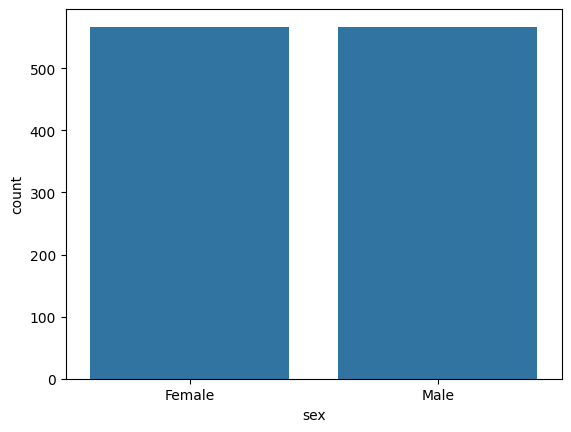

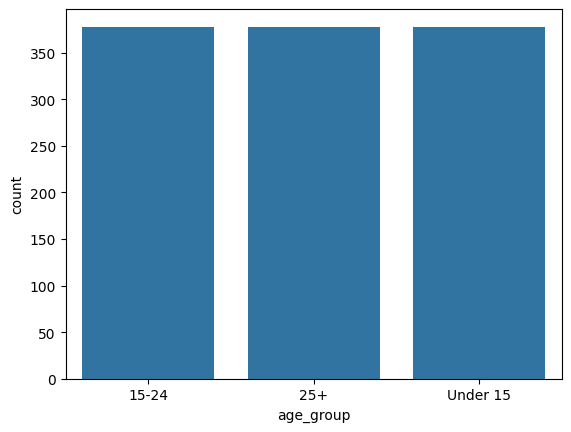

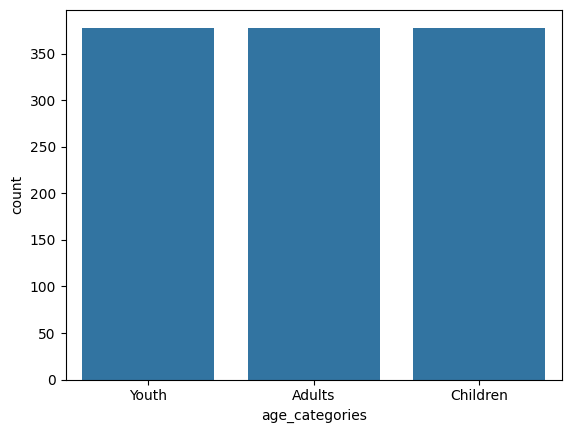

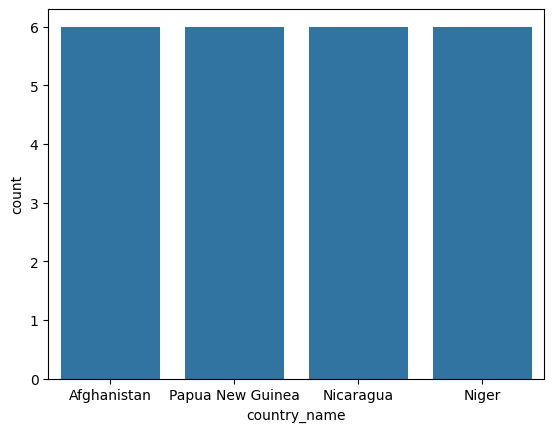

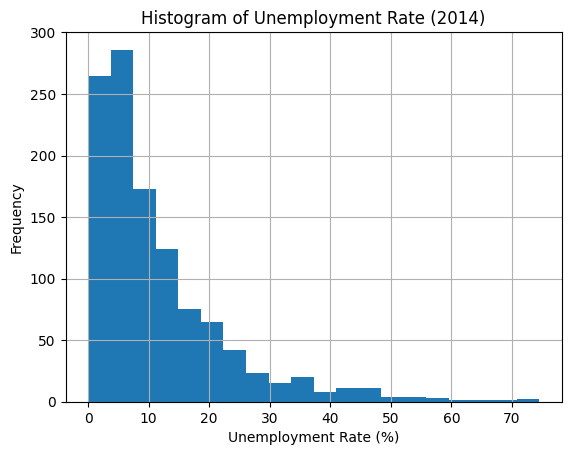

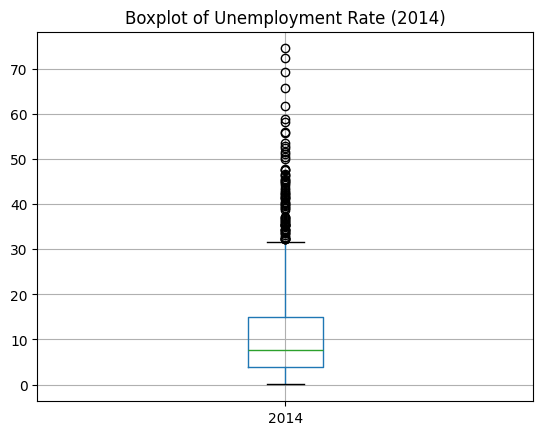

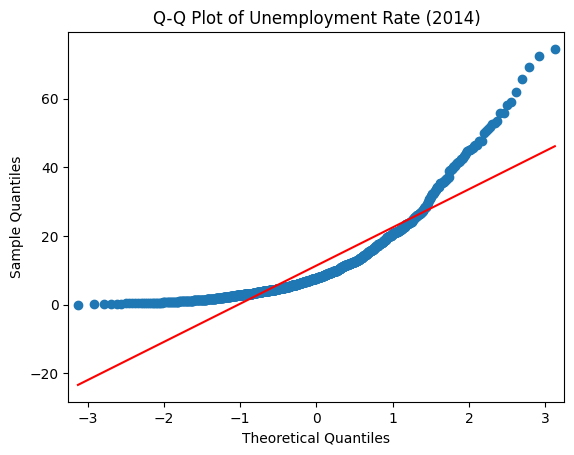

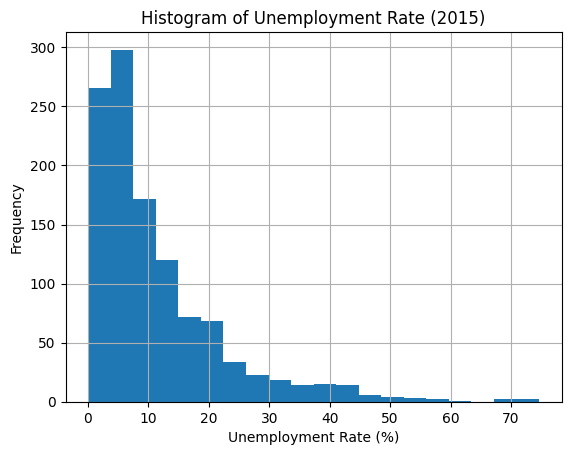

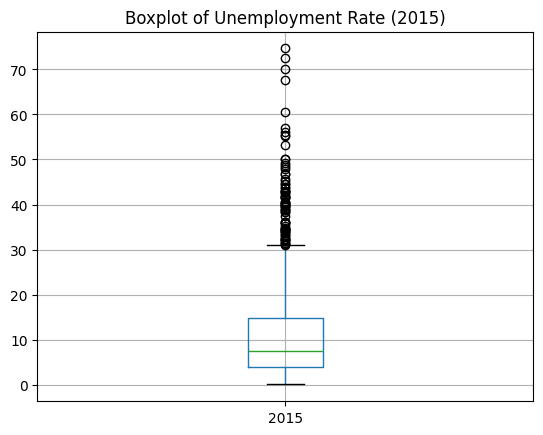

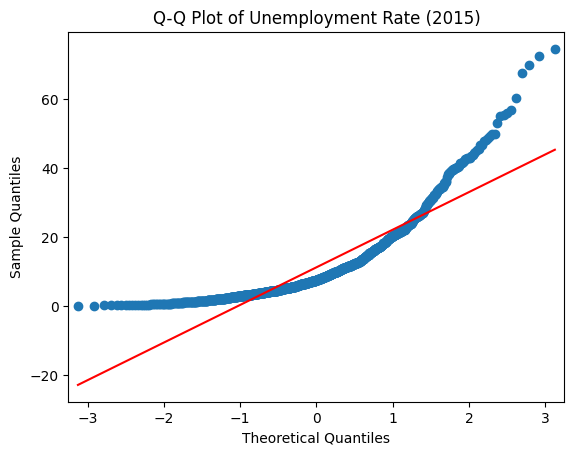

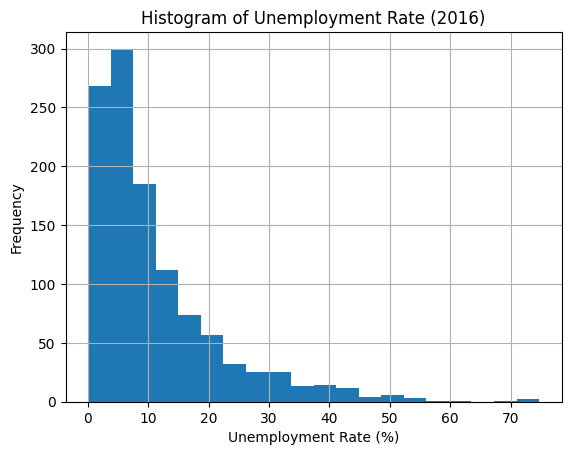

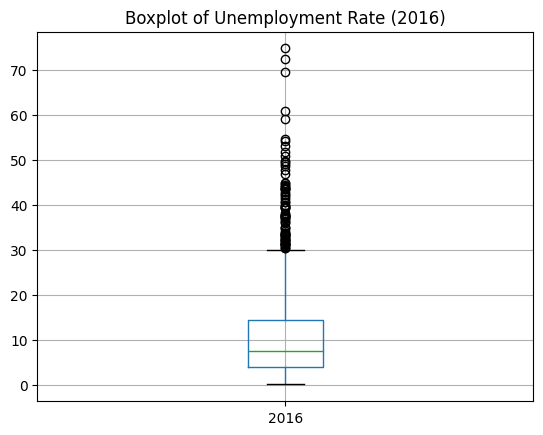

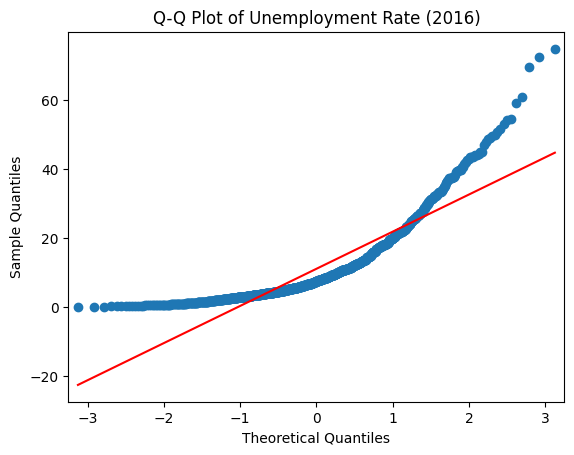

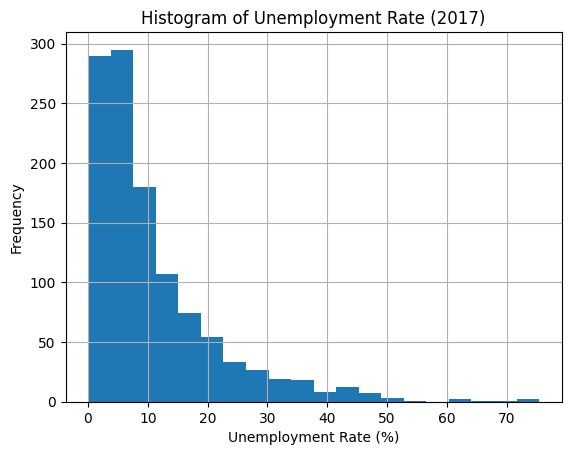

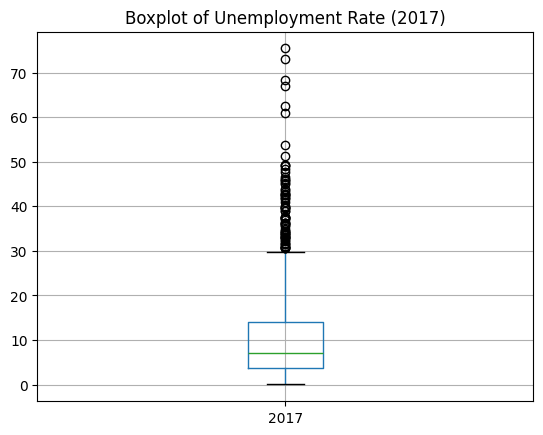

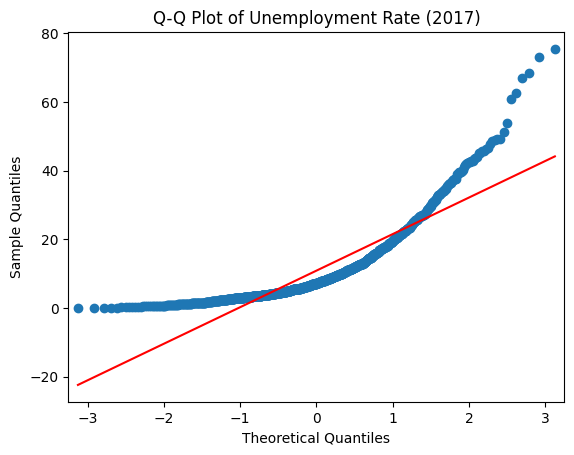

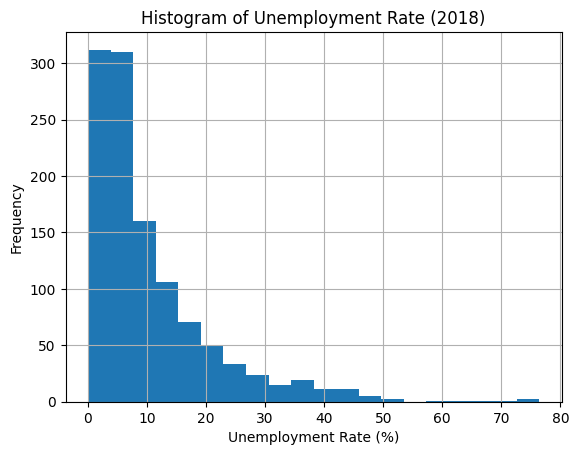

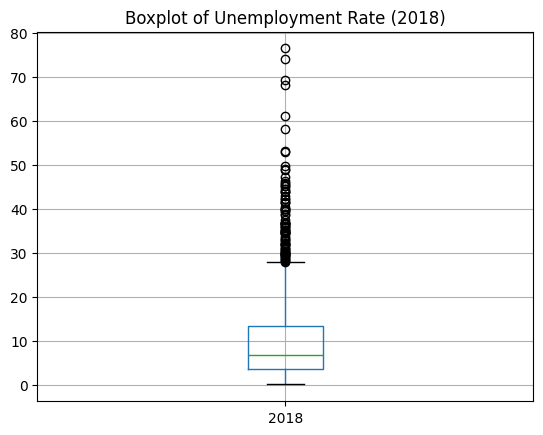

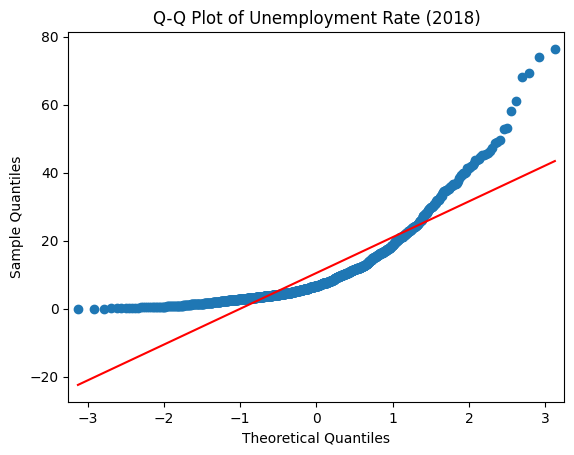

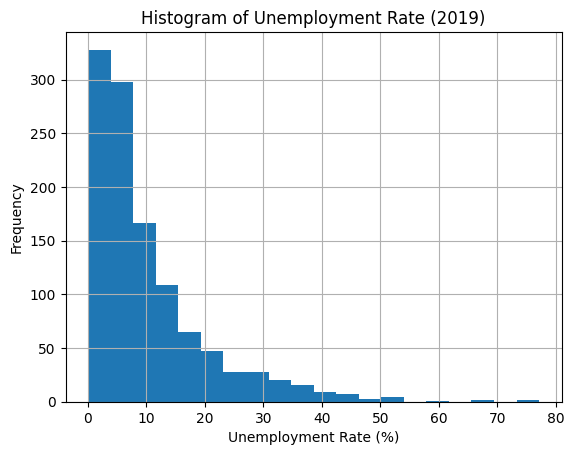

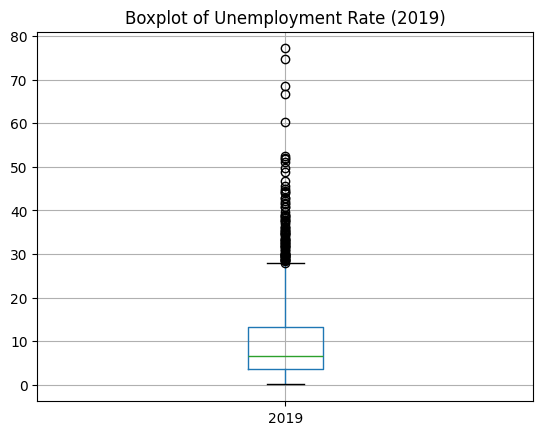

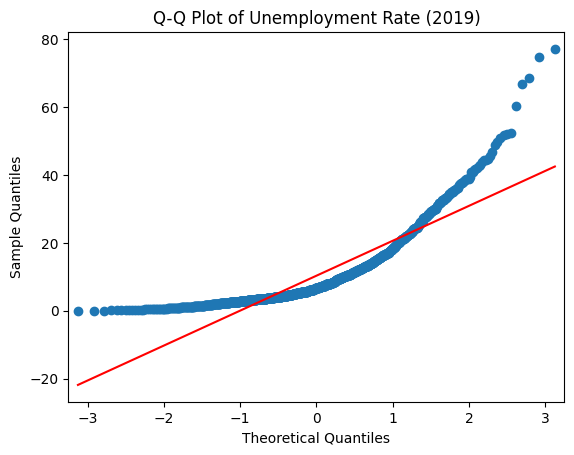

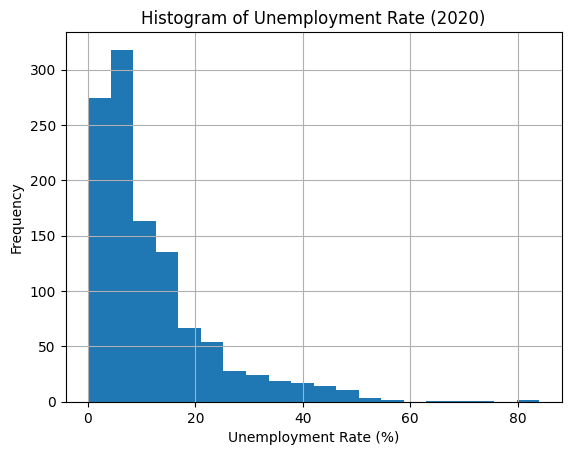

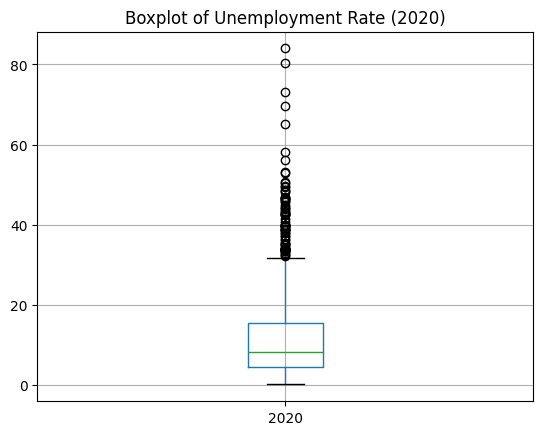

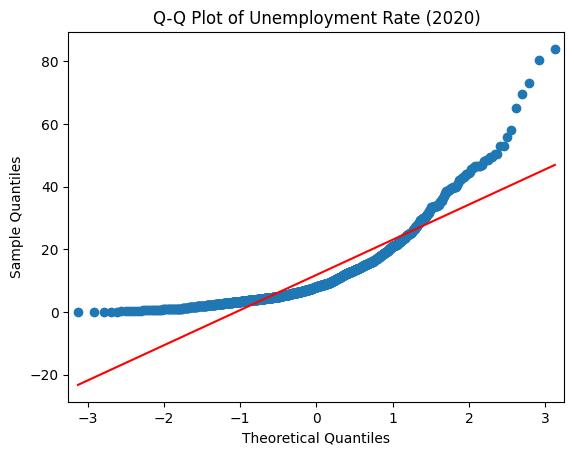

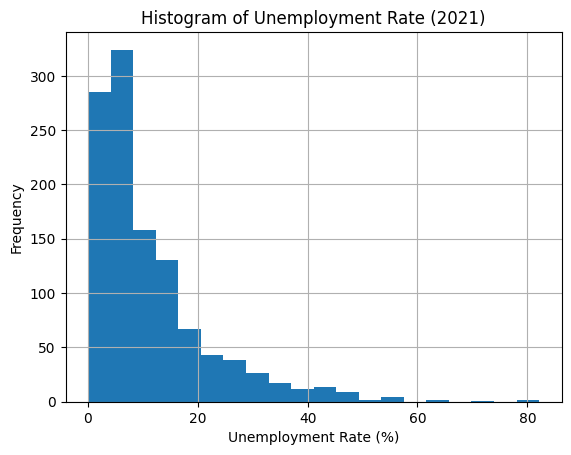

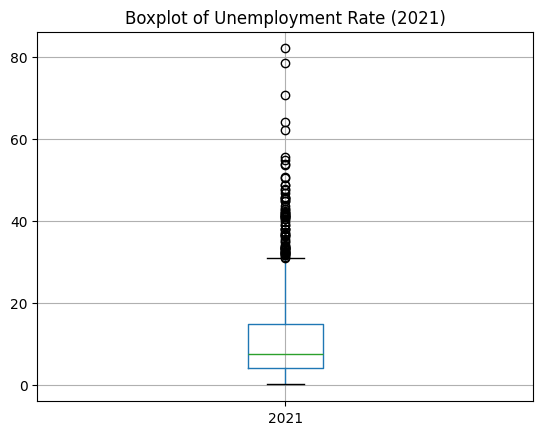

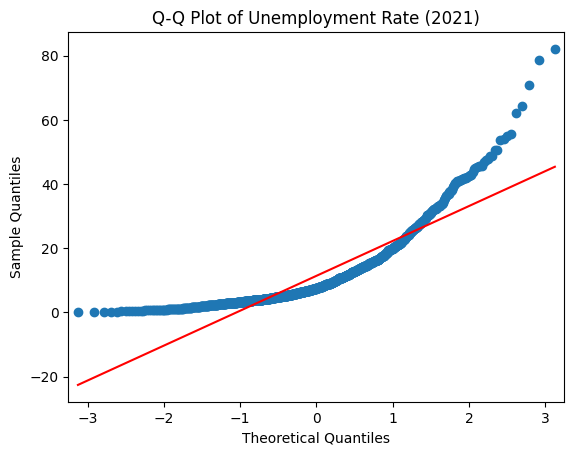

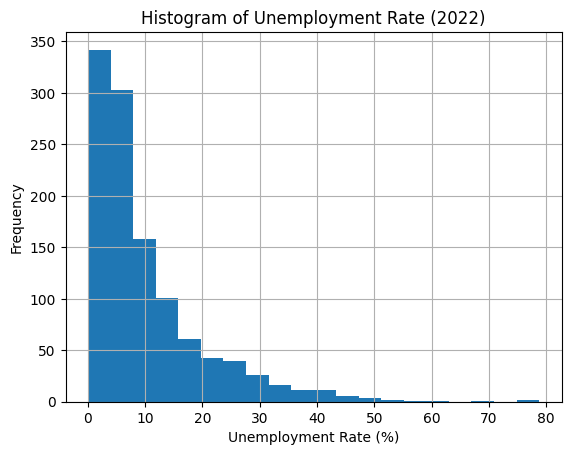

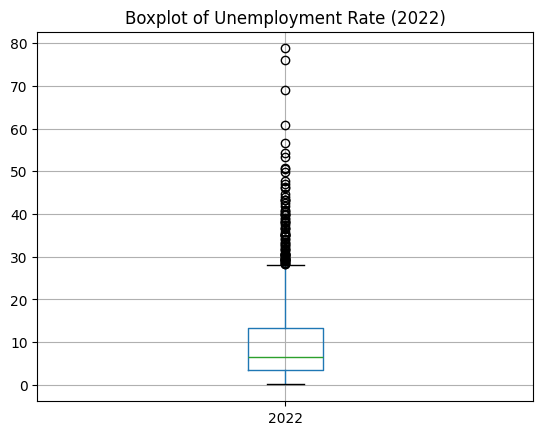

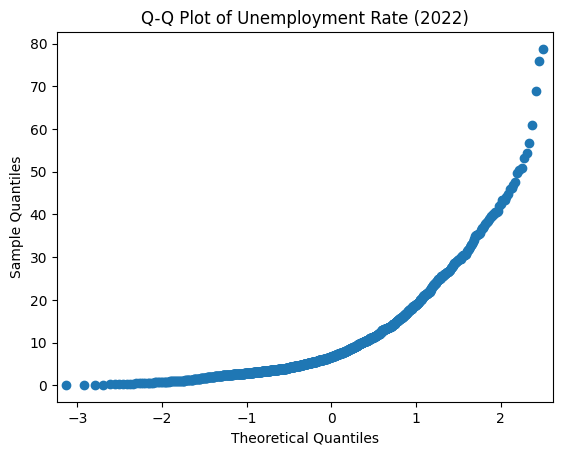

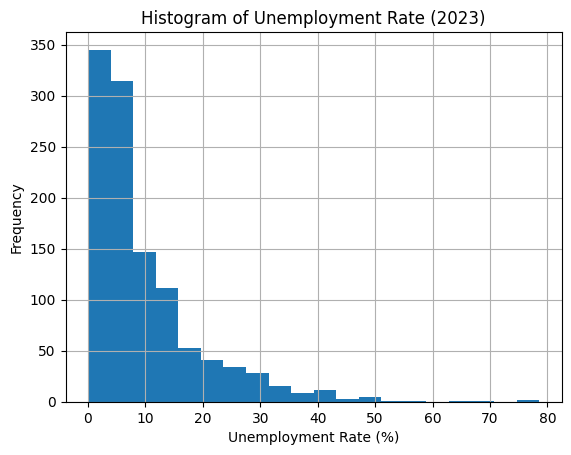

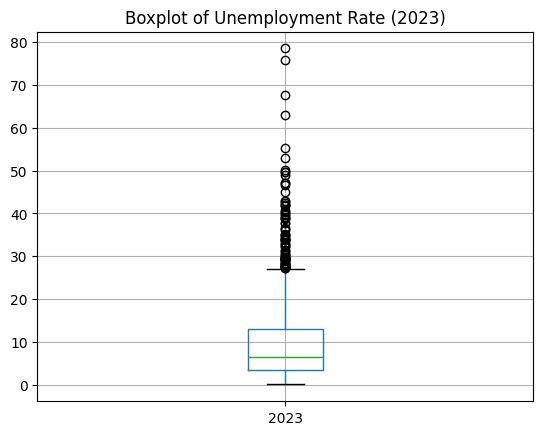

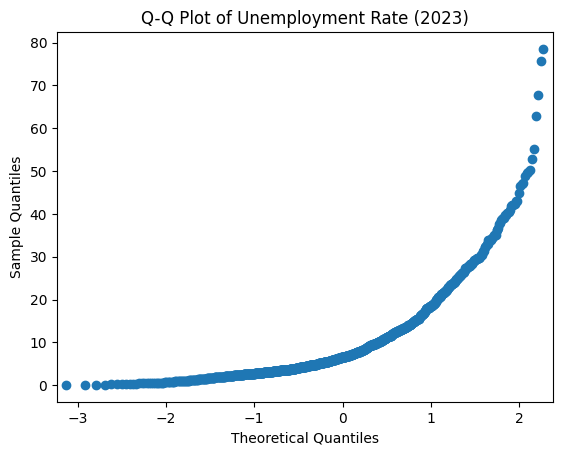

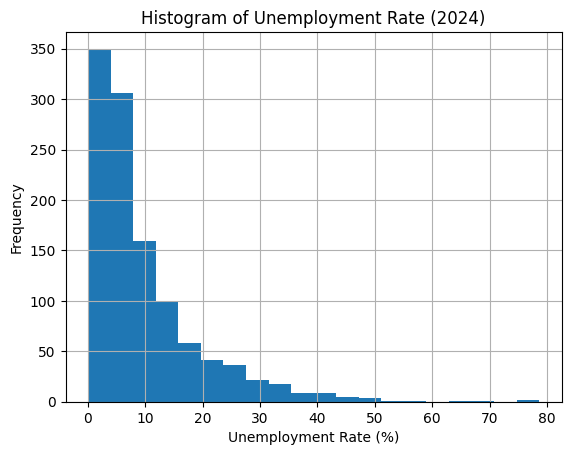

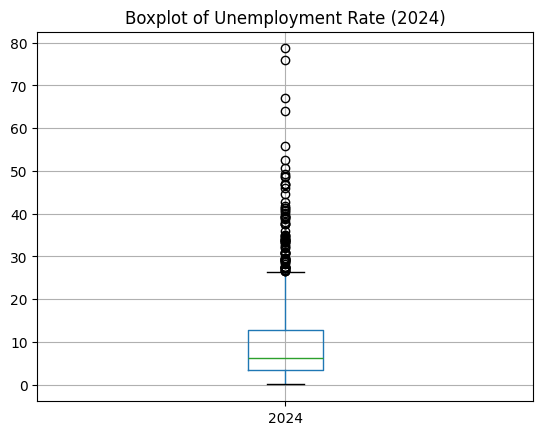

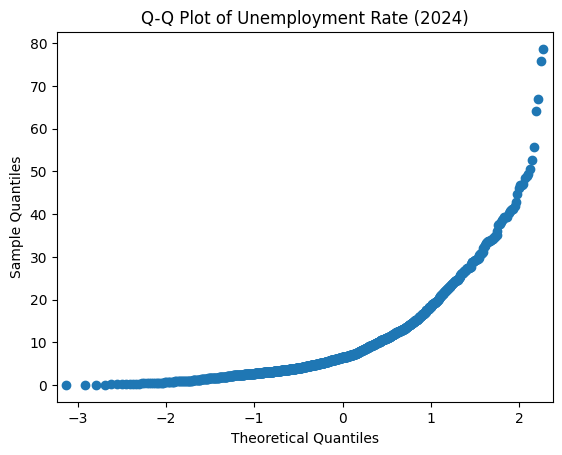

In [26]:
#Univariate Graphical EDA 
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
pt=pd.read_csv("global_unemployment_data.csv")
years=['2014','2015','2016','2017','2018','2019','2020','2021','2022','2023','2024']
sns.countplot(data=pt, x='sex')
plt.show()
#shows the number of records for each gende
sns.countplot(data=pt, x='age_group')
plt.show()
#shows the frequency of records per age group
sns.countplot(data=pt, x='age_categories')
plt.show()
#the same as age_group but more detailed categories(shows the age range)
sns.countplot(data=pt, x='country_name',order=pt['country_name'].value_counts().head(4).index)
plt.show()
#shows the top 4 countries with the most unemployment data entries
for i in years:
    pt.hist(i, bins=20)
    plt.title(f"Histogram of Unemployment Rate ({i})")
    plt.xlabel("Unemployment Rate (%)")
    plt.ylabel("Frequency")
    plt.show()
    #histogram shows how unemployment rates are distributed for the year i
    pt.boxplot(i)
    plt.title(f"Boxplot of Unemployment Rate ({i})")
    plt.show()
    #boxplot highlights median quartiles and outliers for the year i
    sm.qqplot(pt[i],line='s')
    plt.title(f"Q-Q Plot of Unemployment Rate ({i})")
    plt.show()
    # Q-Q plot checks if the unemployment data follows a normal distribution points along the line mean normality


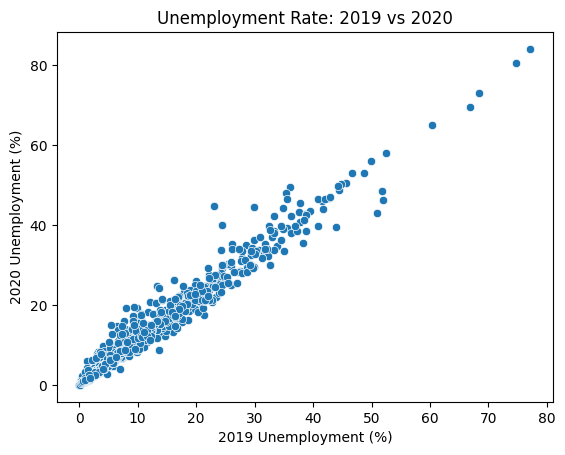

Correlation between 2019 and 2020: 0.9824606375618568
age_group  15-24  25+  Under 15
sex                            
Female       189  189       189
Male         189  189       189


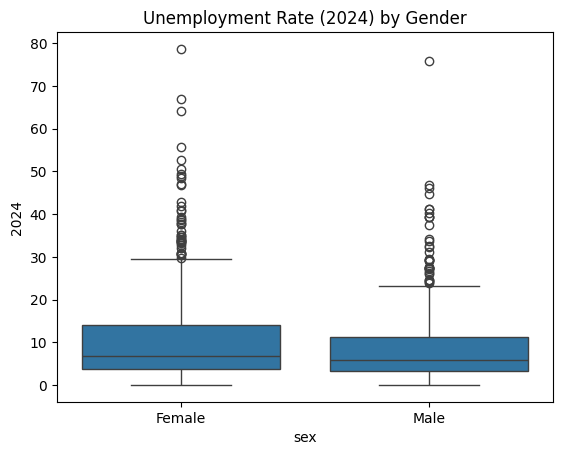

In [27]:
#Bivariate EDA 
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=pt, x='2019', y='2020')
plt.title("Unemployment Rate: 2019 vs 2020")
plt.xlabel("2019 Unemployment (%)")
plt.ylabel("2020 Unemployment (%)")
plt.show()
#it shows a very strong positive correlation between 2019 and 2020 unemployment rates
#meaning countries with higher unemployment in 2019 generally had higher rates in 2020
corr = pt['2019'].corr(pt['2020'])
print("Correlation between 2019 and 2020:", corr)
#the correlation value confirms the strong relationship here it is around 0.98
ct = pd.crosstab(pt['sex'], pt['age_group'])
print(ct)
#it shows the number of records for each combination of gender and age group 
#confirming the dataset is balanced across sexes and age groups
sns.boxplot(data=pt, x='sex', y='2024')
plt.title("Unemployment Rate (2024) by Gender")
plt.show()
#it shows the distribution of 2024 unemployment rates for males and females
#allowing easy comparison of median, spread, and potential outliers between genders

          2014      2015      2016      2017      2018      2019      2020  \
2014  1.000000  0.991114  0.976271  0.955095  0.935754  0.913677  0.898187   
2015  0.991114  1.000000  0.988661  0.971848  0.954966  0.935096  0.918252   
2016  0.976271  0.988661  1.000000  0.987073  0.973800  0.959164  0.943058   
2017  0.955095  0.971848  0.987073  1.000000  0.991444  0.979823  0.961725   
2018  0.935754  0.954966  0.973800  0.991444  1.000000  0.990674  0.973474   
2019  0.913677  0.935096  0.959164  0.979823  0.990674  1.000000  0.982461   
2020  0.898187  0.918252  0.943058  0.961725  0.973474  0.982461  1.000000   
2021  0.899585  0.920289  0.945326  0.961598  0.973242  0.983479  0.987180   
2022  0.883992  0.905799  0.932096  0.951272  0.963403  0.976309  0.973695   
2023  0.874081  0.894930  0.920307  0.942089  0.955874  0.969793  0.966530   
2024  0.869704  0.890726  0.916474  0.939183  0.952984  0.967225  0.964062   

          2021      2022      2023      2024  
2014  0.899585  

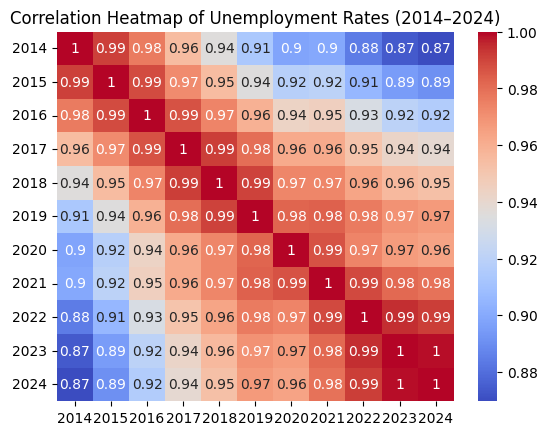

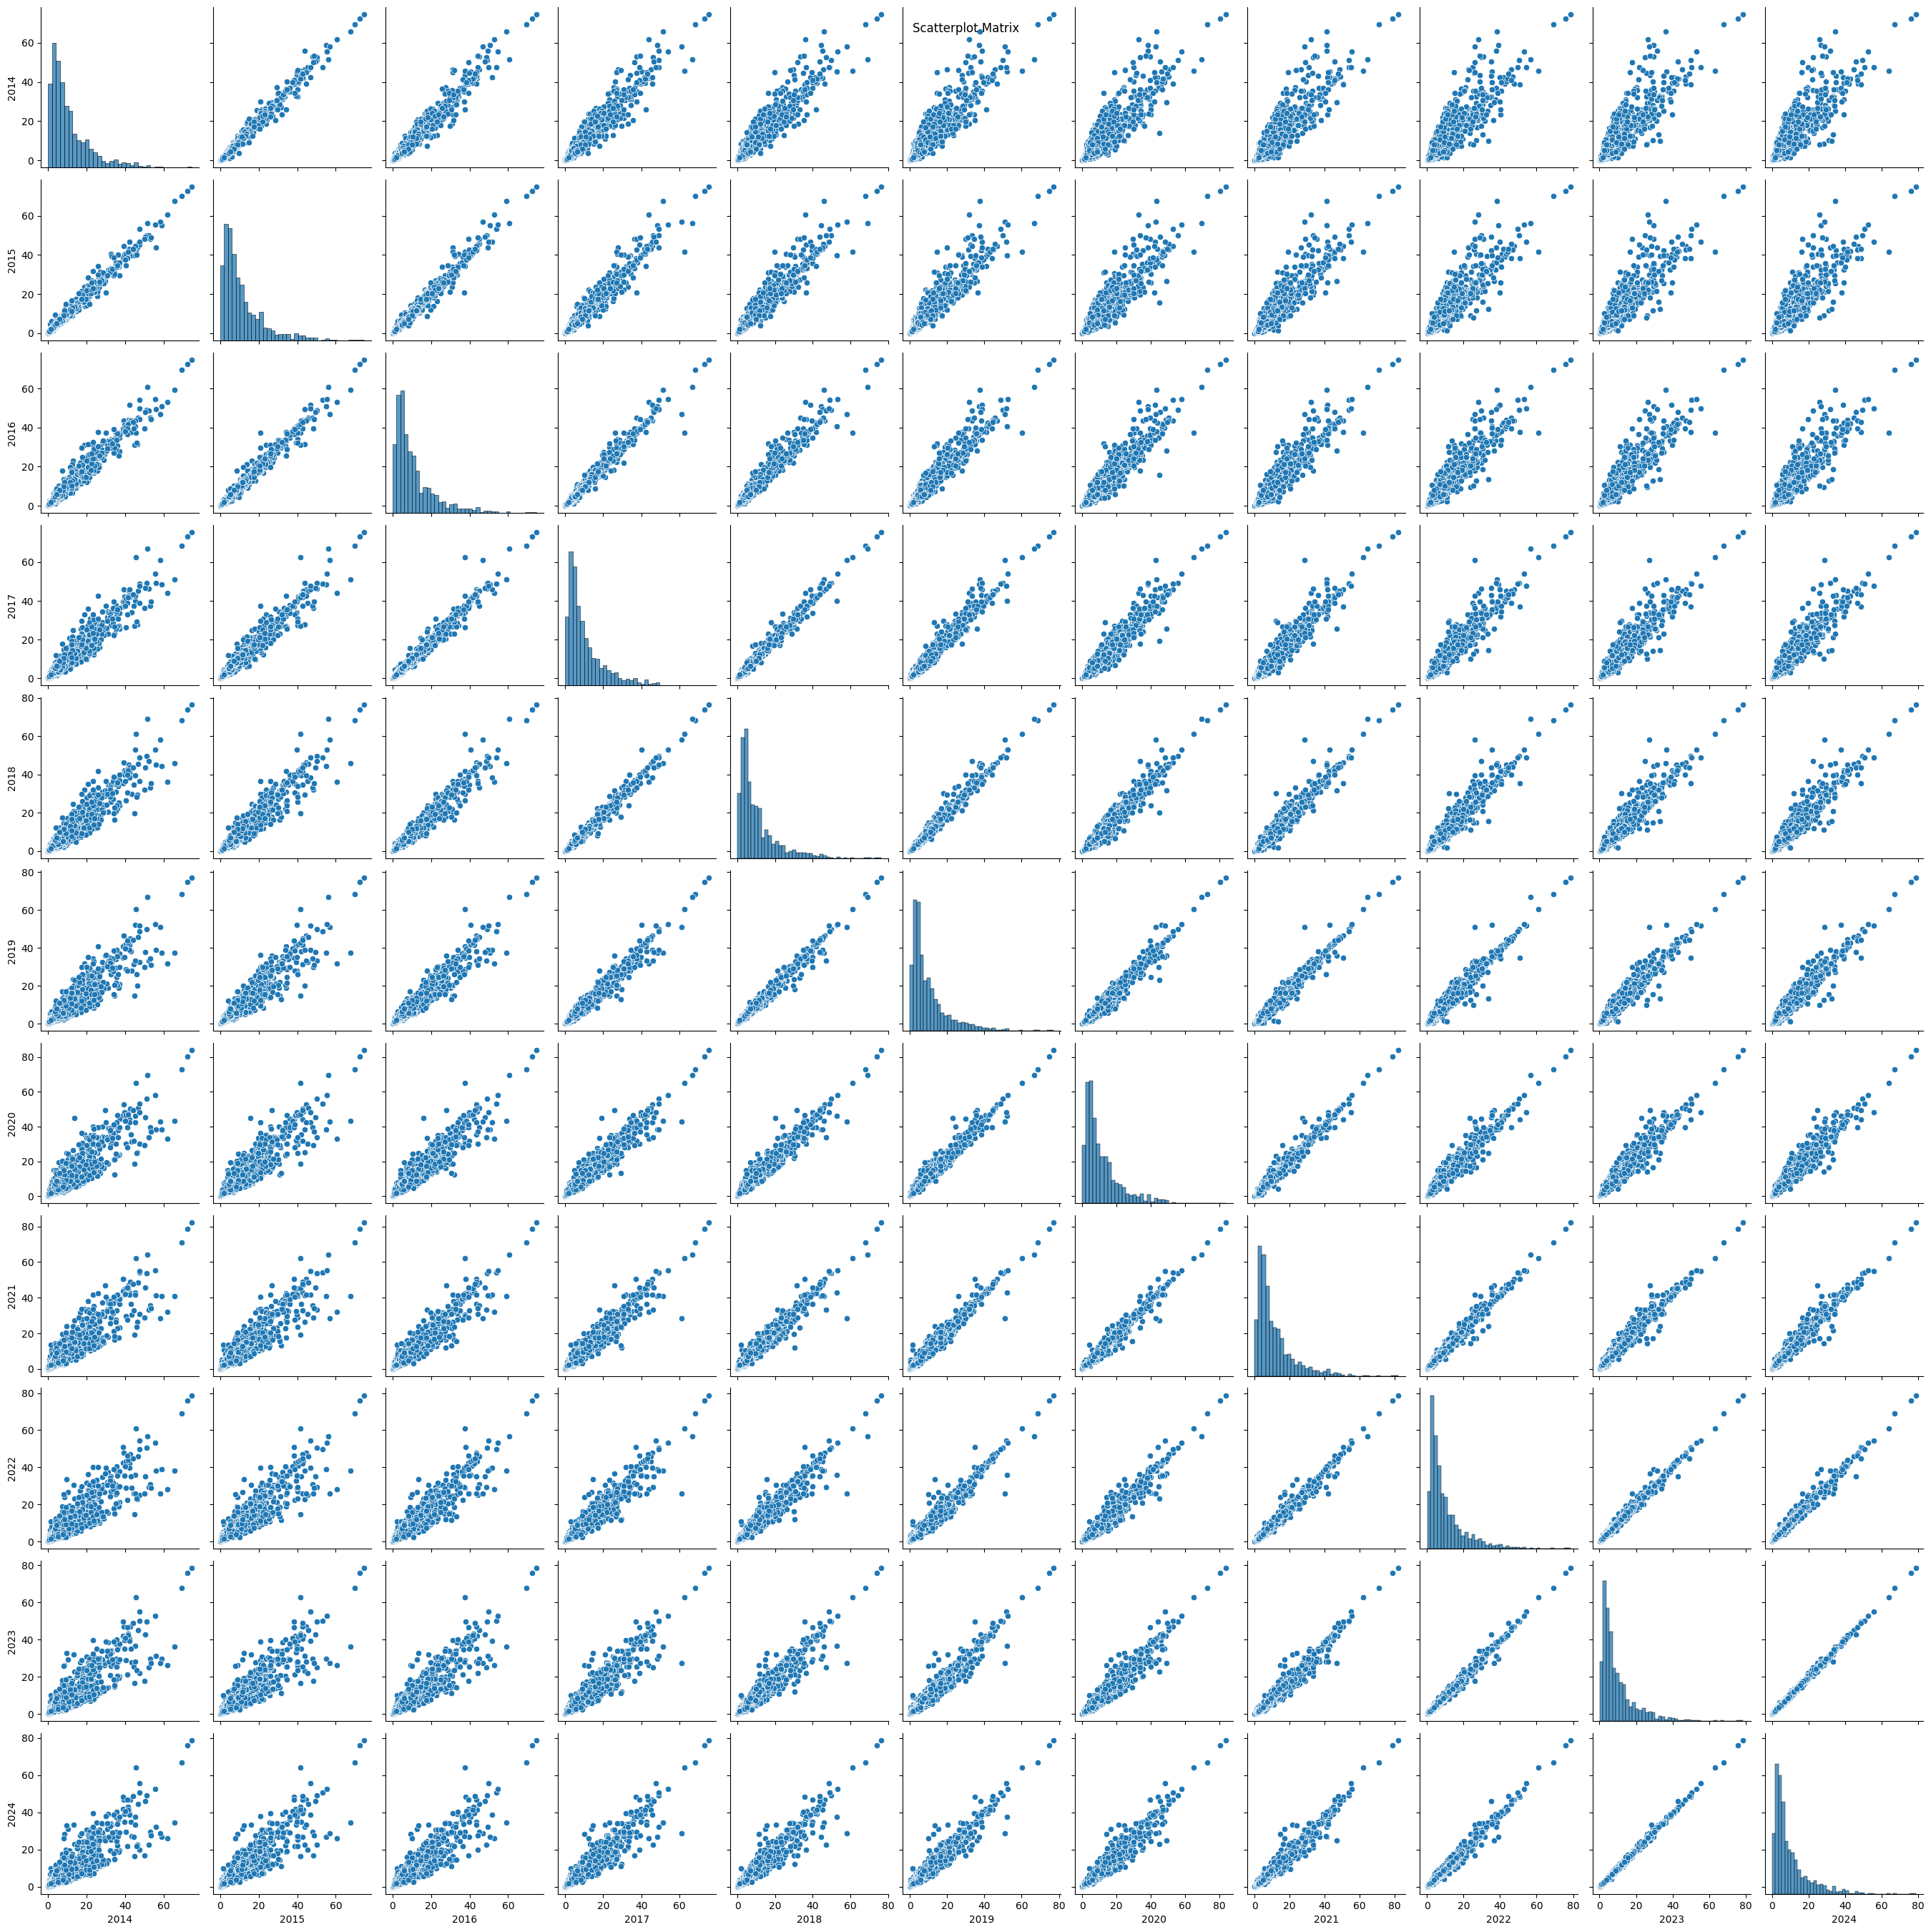

In [28]:
# Multivariate EDA 
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
pt=pd.read_csv("global_unemployment_data.csv")
years=['2014','2015','2016','2017','2018','2019','2020','2021','2022','2023','2024']
corr1= pt[years].corr()
print(corr1)
sns.heatmap(corr1, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Unemployment Rates (2014–2024)")
plt.show()
#this heatmap shows that unemployment rates are strongly positively correlated across years
#meaning countries with high unemployment in one year tend to have high rates in other yearr
sns.pairplot(pt[years])
plt.suptitle("Scatterplot Matrix")
plt.show()
#the scatterplots confirm the strong positive correlations showing most points lie along a diagonal line
#and the histograms on the diagonal show the distribution of unemployment rates for each year
#some soutliers are visible, indicating a few countries with unusually high or low unemployment in years

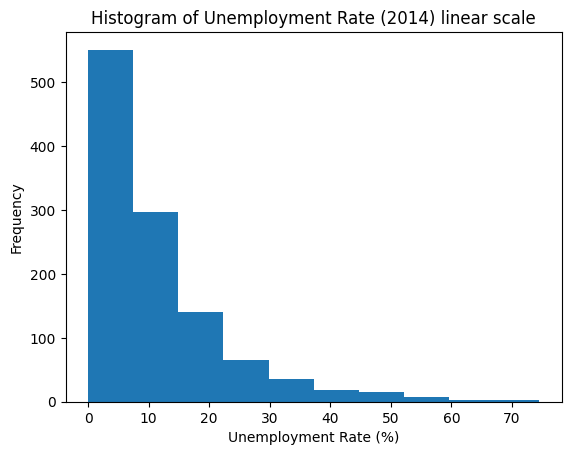

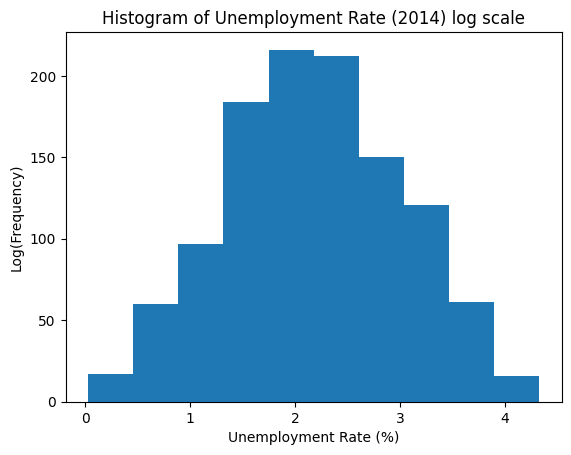

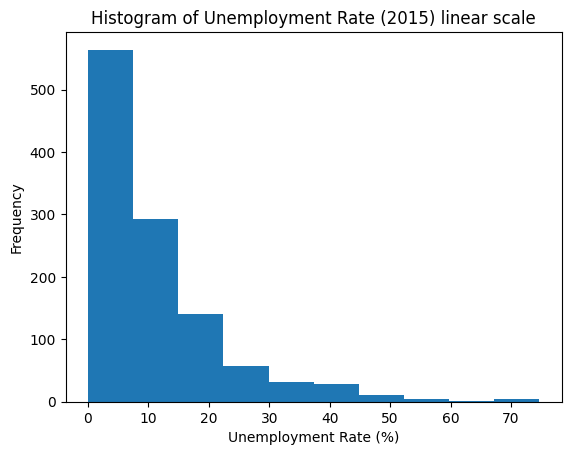

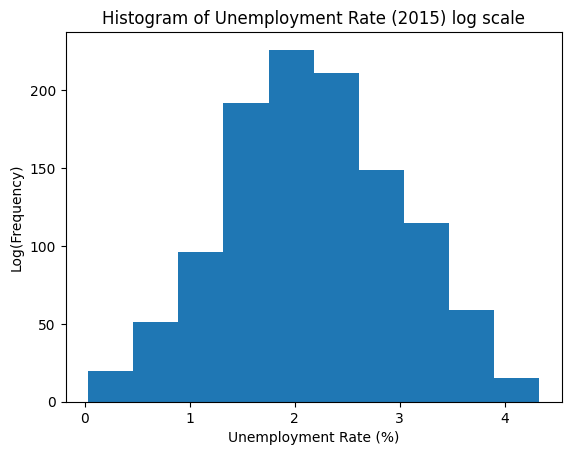

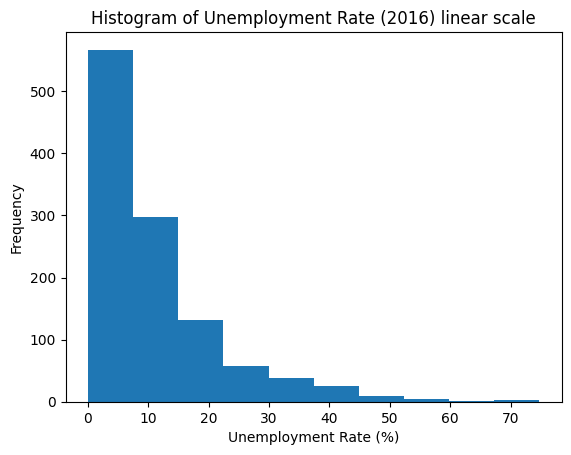

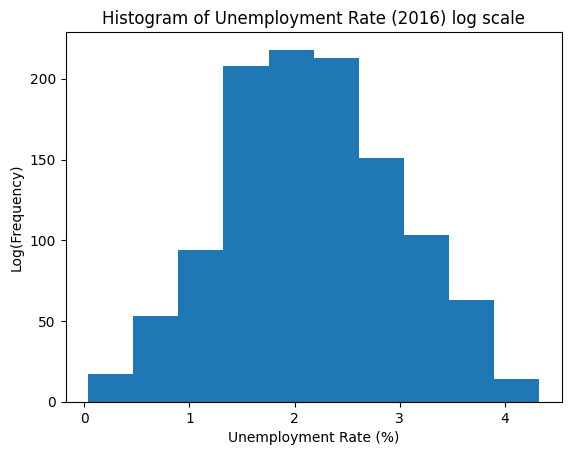

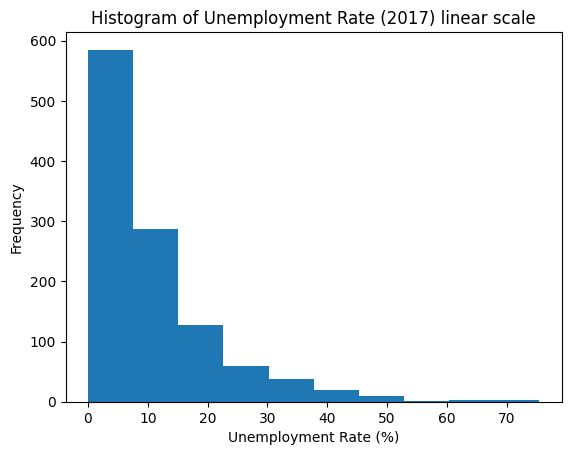

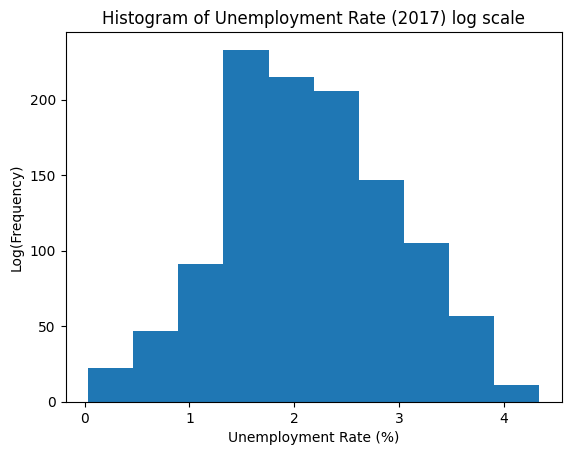

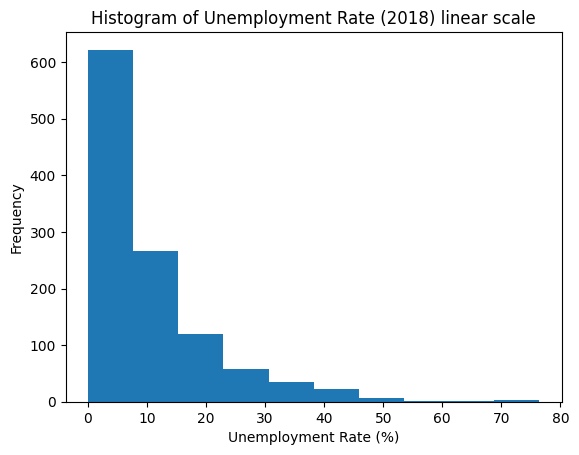

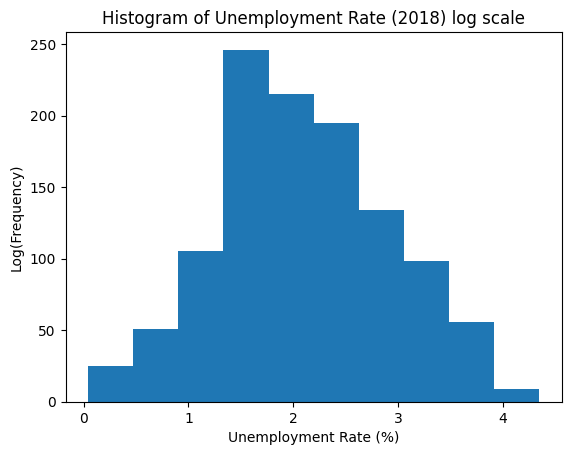

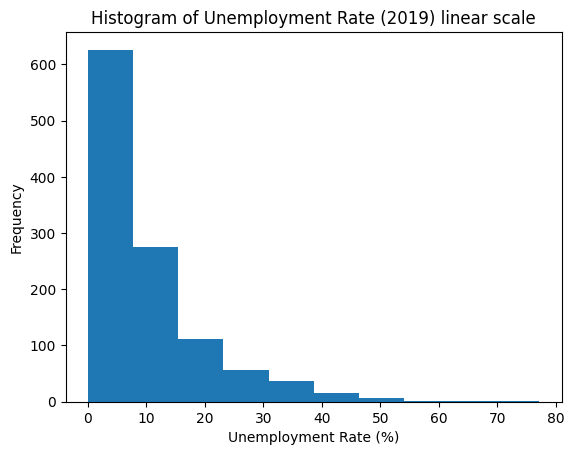

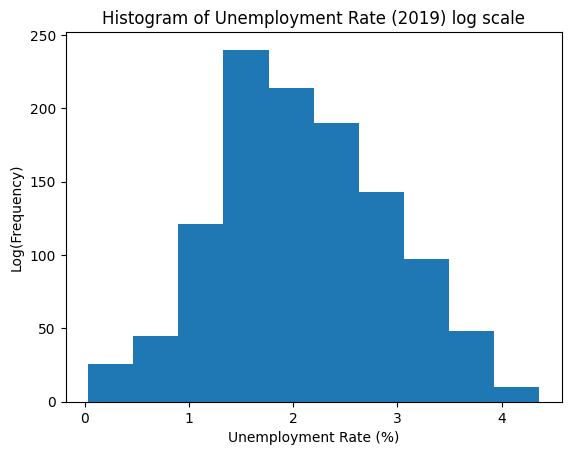

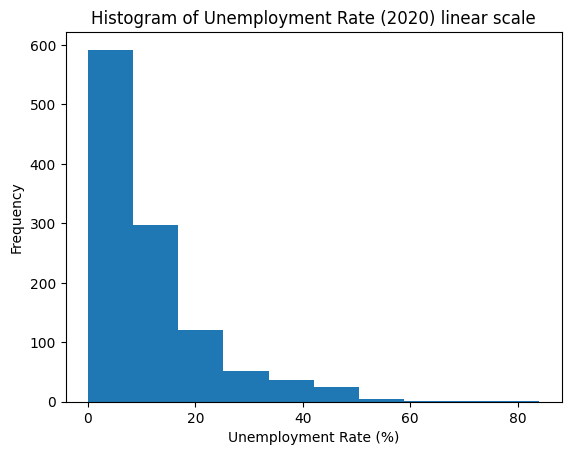

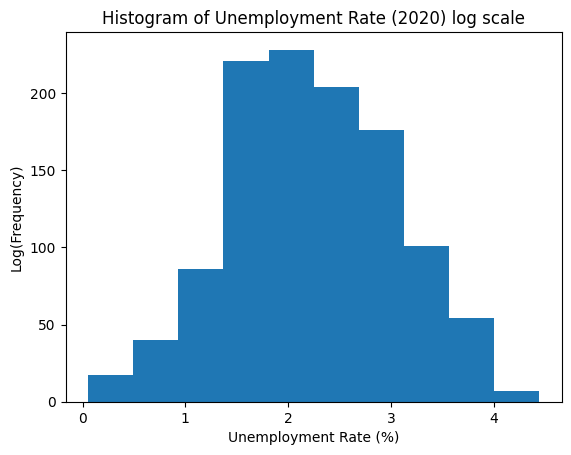

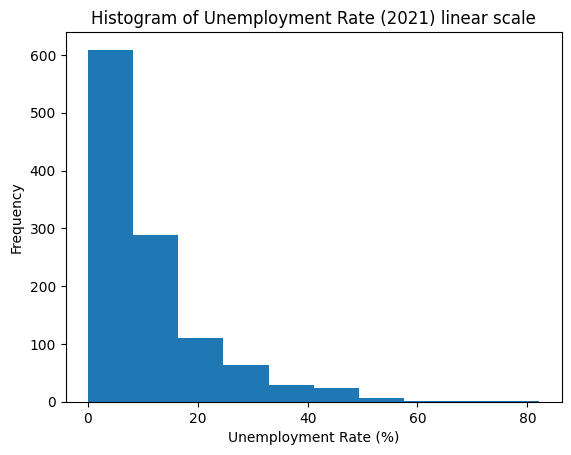

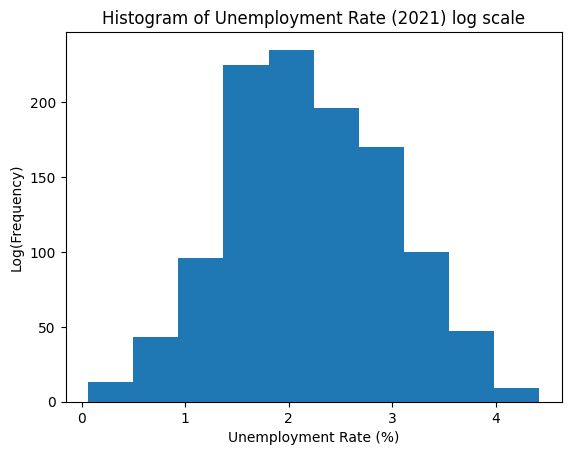

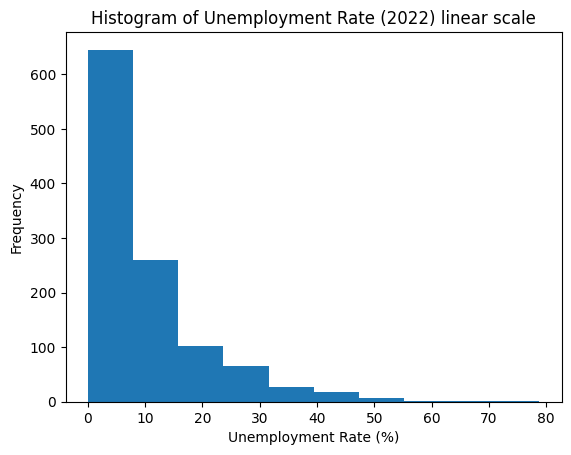

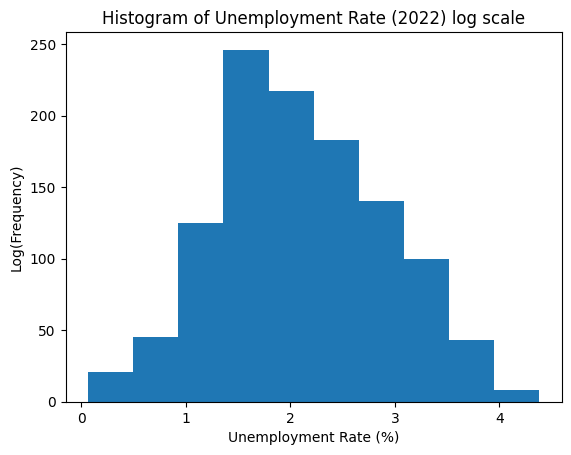

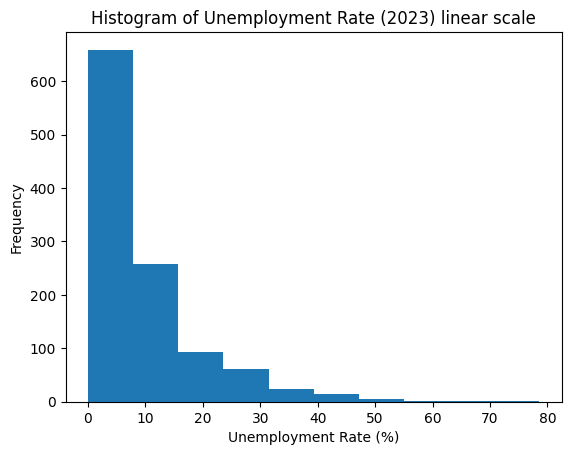

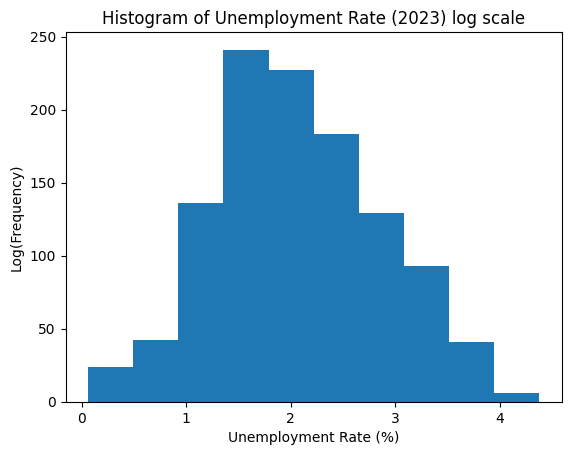

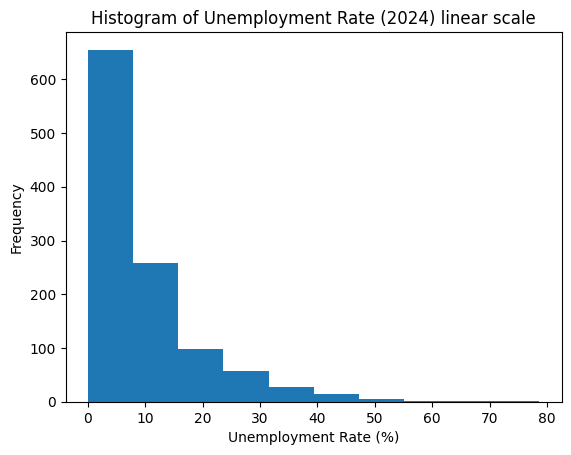

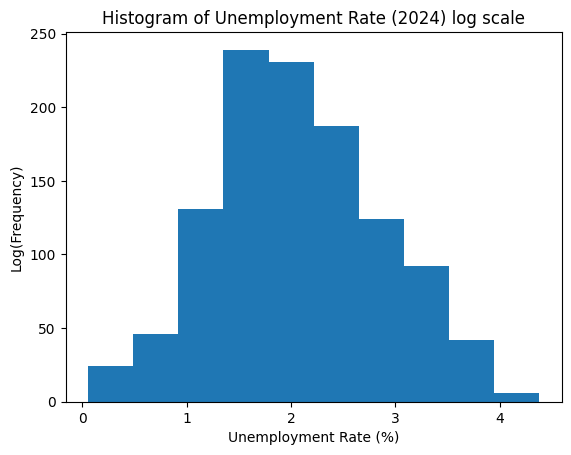

In [29]:
#Scales & Visualization Choices (brief) 
import matplotlib.pyplot as plt
import pandas as pd
pt=pd.read_csv("global_unemployment_data.csv")
years=['2014','2015','2016','2017','2018','2019','2020','2021','2022','2023','2024']
for i in years:
    plt.hist(pt[i].dropna())
    plt.title(f"Histogram of Unemployment Rate ({i}) linear scale")
    plt.xlabel("Unemployment Rate (%)")
    plt.ylabel("Frequency")
    plt.show()
    plt.hist(np.log(pt[i].dropna()+1))
    plt.title(f"Histogram of Unemployment Rate ({i}) log scale")
    plt.xlabel("Unemployment Rate (%)")
    plt.ylabel("Log(Frequency)")
    plt.show()
#plot explenation
#i used hist because its better with numiric valuse (its disribution)
#In the normal (linear) graph most data is near 0–20% so it's hard to see the rest but  
#With the log scal we can see the rare high values more clearly  
#It helps when numbers are very different in size

**Summary of Findings (200–300 words)**:

the EDA that i had done for unemployment rate dataset from (2014-2024) shows sevearls patterns and trends.The distributions of unemployment rates across countries are mostly right skewed meaning that most countries have low to medium unemployment rates, while only a few have very high rates.Each year there are noticeable outliers, representing countries with unemployment levels much higher or lower than the global average

there are outliers every year which means some countries have unemployment rates that are much higher or lower than most others the standard deviation and variance are also large showing big differences between countries the Q–Q plots also show strong deviations from the diagonal line indicating that the data is not normally distributed and contains outliers

I observed that the number of male and female entries is the same and each country appears exactly four times every age group (15–24, 25+, Under 15) also has an equal number of records which helps balance the dataset and reduce potential bias in the analysis moreover I noticed that the unemployment rate for women was higher than that for men in 2024 (the year I focused on for the Bivariate EDA) There were noticeable outliers up until 2022 but the data started to return to normal afterward this pattern can be explained by the pandemic period during which many people lost their jobs

if this data were used for future modeling i think it would be useful to include other features like education, or population growth to help explain why unemployment changes and we could also foucs on studying it for a spesific country 

limitations:
EDA alone can not tell us why unemployment rate is high or low it only help us with  statistical modeling ,patterns, relationships and correlations in the data but not the reasons behind them moreover missing data or wrong data can miss with the accuracy of EDA analysis